# 4. Creating Plots on Data Aware Grids

Using Seaborn to draw multiple plots in a single figure.

# Building a FacetGrid

Seaborn's FacetGrid is the foundation for building data-aware grids. A data-aware grid allows you to create a series of small plots that can be useful for understanding complex data relationships.

For these exercises, we will continue to look at the College Scorecard Data from the US Department of Education. This rich dataset has many interesting data elements that we can plot with Seaborn.

When building a FacetGrid, there are two steps:

Create a FacetGrid object with columns, rows, or hue.
Map individual plots to the grid.

# Instructions:

- Create a FacetGrid that shows a point plot of the Average SAT scores SAT_AVG_ALL.
- Use row_order to control the display order of the degree types.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


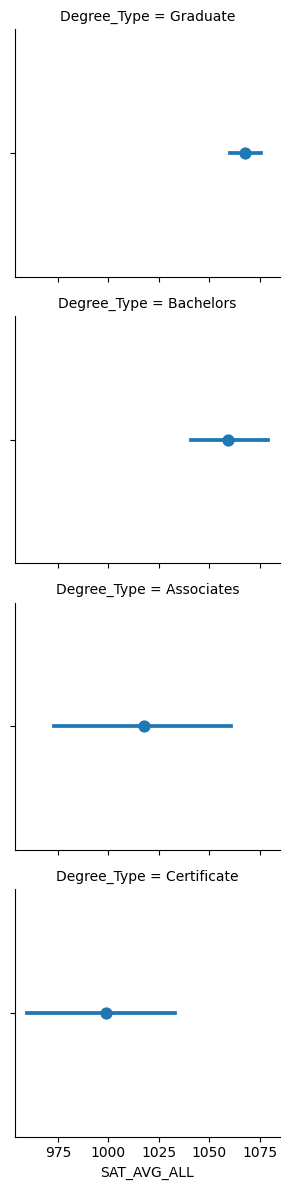

<Figure size 640x480 with 0 Axes>

In [2]:
df = pd.read_csv("data4.csv")
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df, 
             row = "Degree_Type",
             row_order = ['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

# Using a catplot

In many cases, Seaborn's catplot() can be a simpler way to create a FacetGrid. Instead of creating a grid and mapping the plot, we can use the catplot() to create a plot with one line of code.

For this exercise, we will recreate one of the plots from the previous exercise using catplot() and show how to create a boxplot on a data-aware grid.

# Instructions:

- Create a catplot() that contains a boxplot (box) of Tuition values varying by Degree_Type across rows.

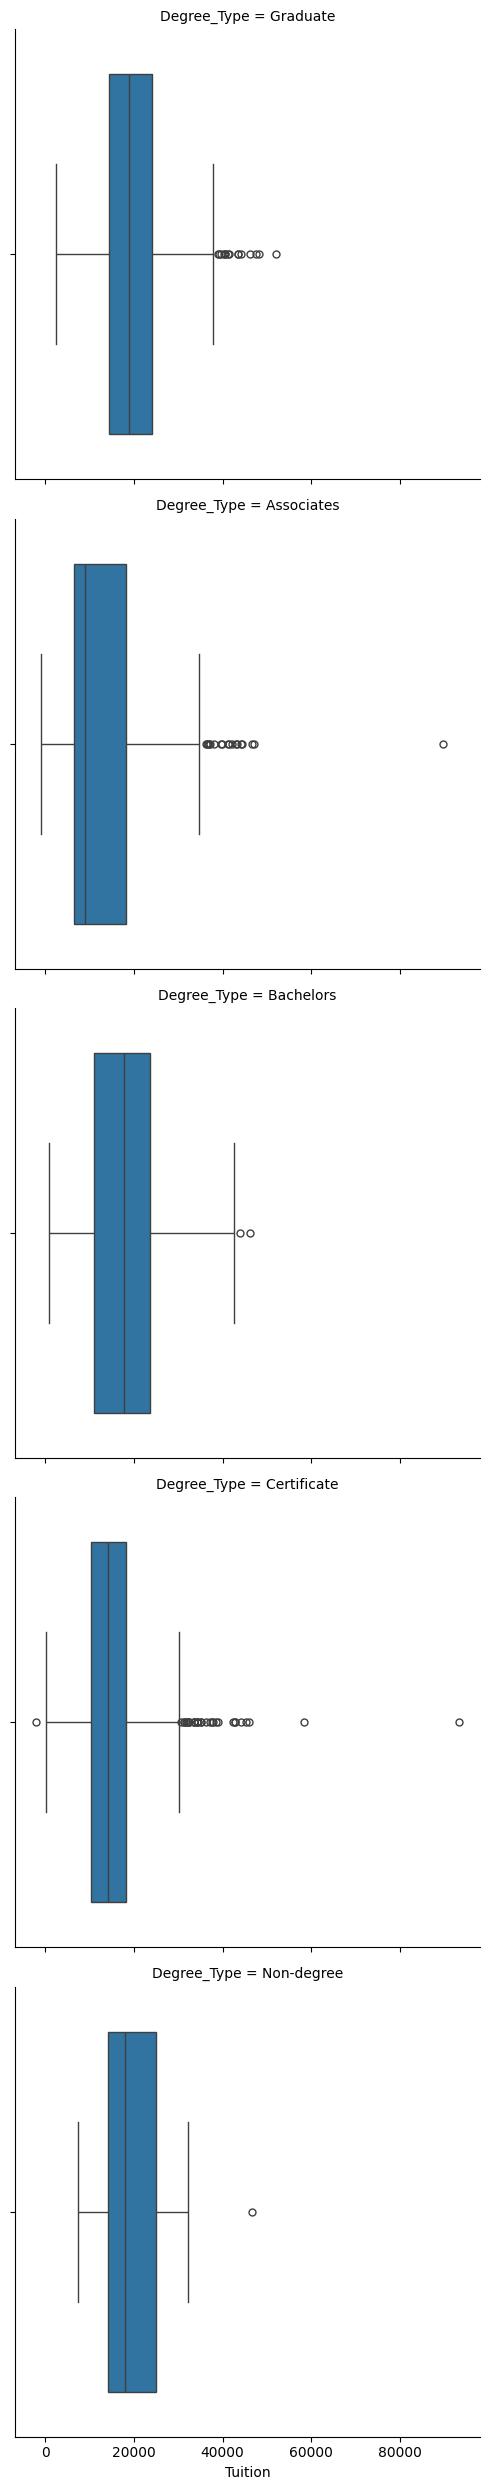

<Figure size 640x480 with 0 Axes>

In [3]:
# Create a factor plot that contains boxplots of Tuition values
sns.catplot(data = df,
         x = 'Tuition',
         kind = 'box',
         row = 'Degree_Type')

plt.show()
plt.clf()

- Create a catplot() of SAT Averages (SAT_AVG_ALL) facetted across Degree_Type that shows a pointplot (point).
- Use row_order to order the degrees from highest to lowest level.

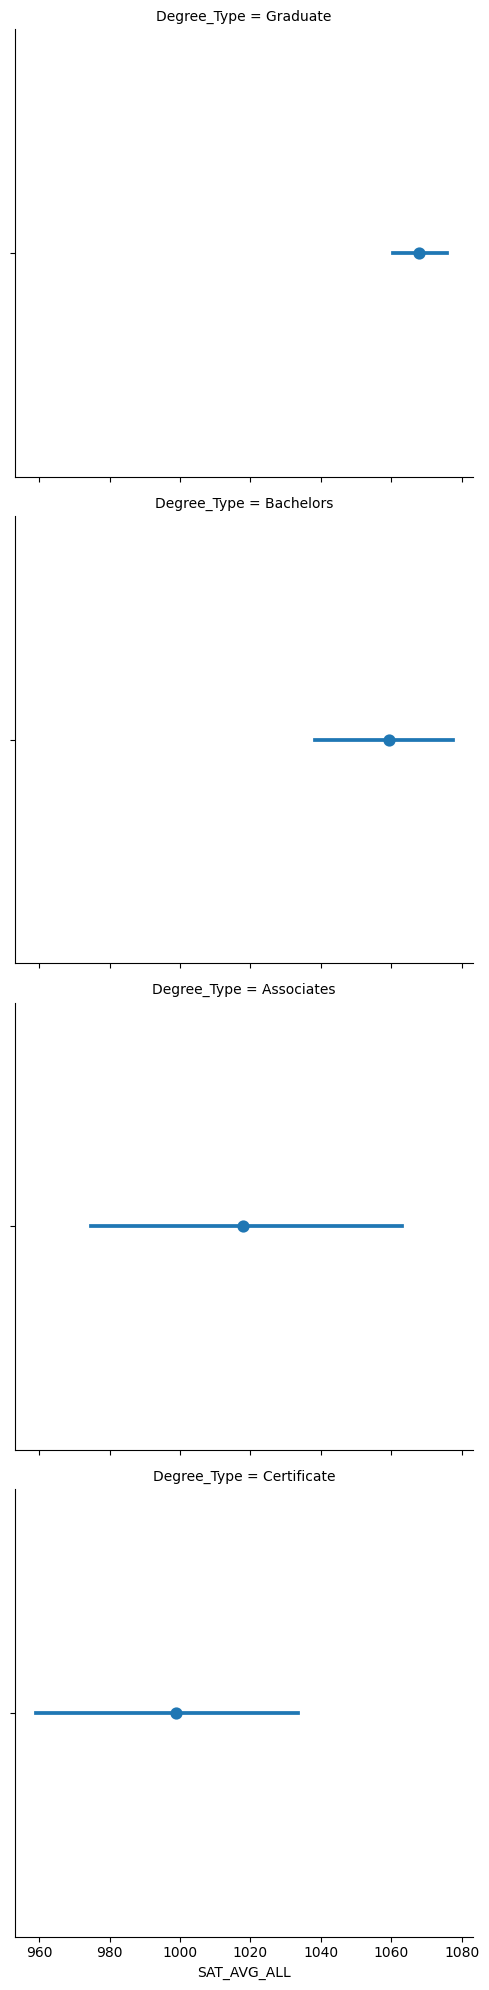

<Figure size 640x480 with 0 Axes>

In [4]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.catplot(data = df,
        x = 'SAT_AVG_ALL',
        kind = 'point',
        row = 'Degree_Type',
        row_order = ['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

# Using a lmplot

The lmplot is used to plot scatter plots with regression lines on FacetGrid objects. The API is similar to catplot with the difference that the default behavior of lmplot is to plot regression lines.

For the first set of exercises, we will look at the Undergraduate population (UG) and compare it to the percentage of students receiving Pell Grants (PCTPELL).

For the second lmplot exercise, we can look at the relationships between Average SAT scores and Tuition across the different degree types and public vs. non-profit schools.

# Instructions:

- Create a FacetGrid() with Degree_Type columns and scatter plot of UG and PCTPELL.

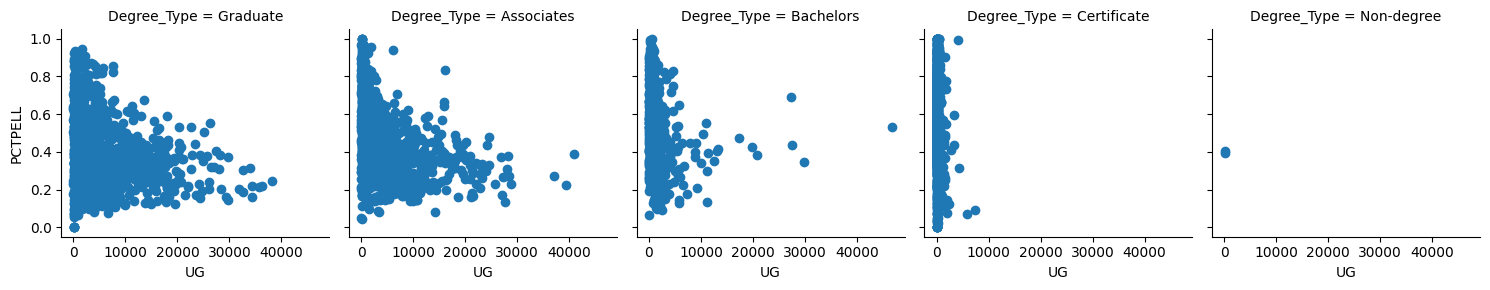

<Figure size 640x480 with 0 Axes>

In [10]:
df = pd.read_csv("data4.csv")

# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df, col = "Degree_Type")

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

- Create a lmplot() using the same values from the FacetGrid().

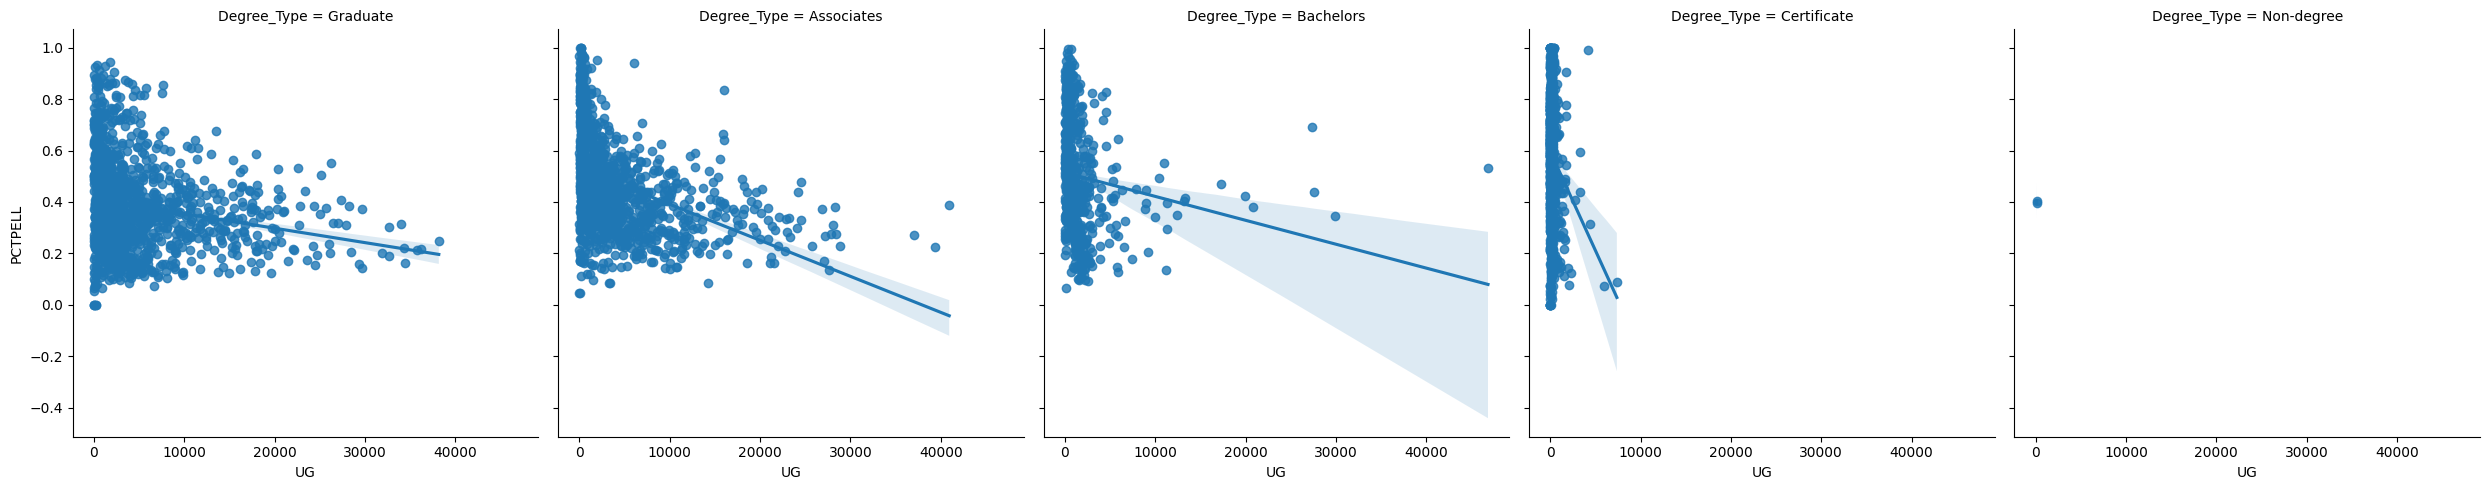

<Figure size 640x480 with 0 Axes>

In [11]:
# Re-create the previous plot as an lmplot
sns.lmplot(data = df,
        x = 'UG',
        y = 'PCTPELL',
        col = "Degree_Type")

plt.show()
plt.clf()

- Create a facetted lmplot() comparing SAT_AVG_ALL to Tuition with columns varying by Ownership and rows by Degree_Type.
- In the lmplot() add a hue for Women Only Universities.

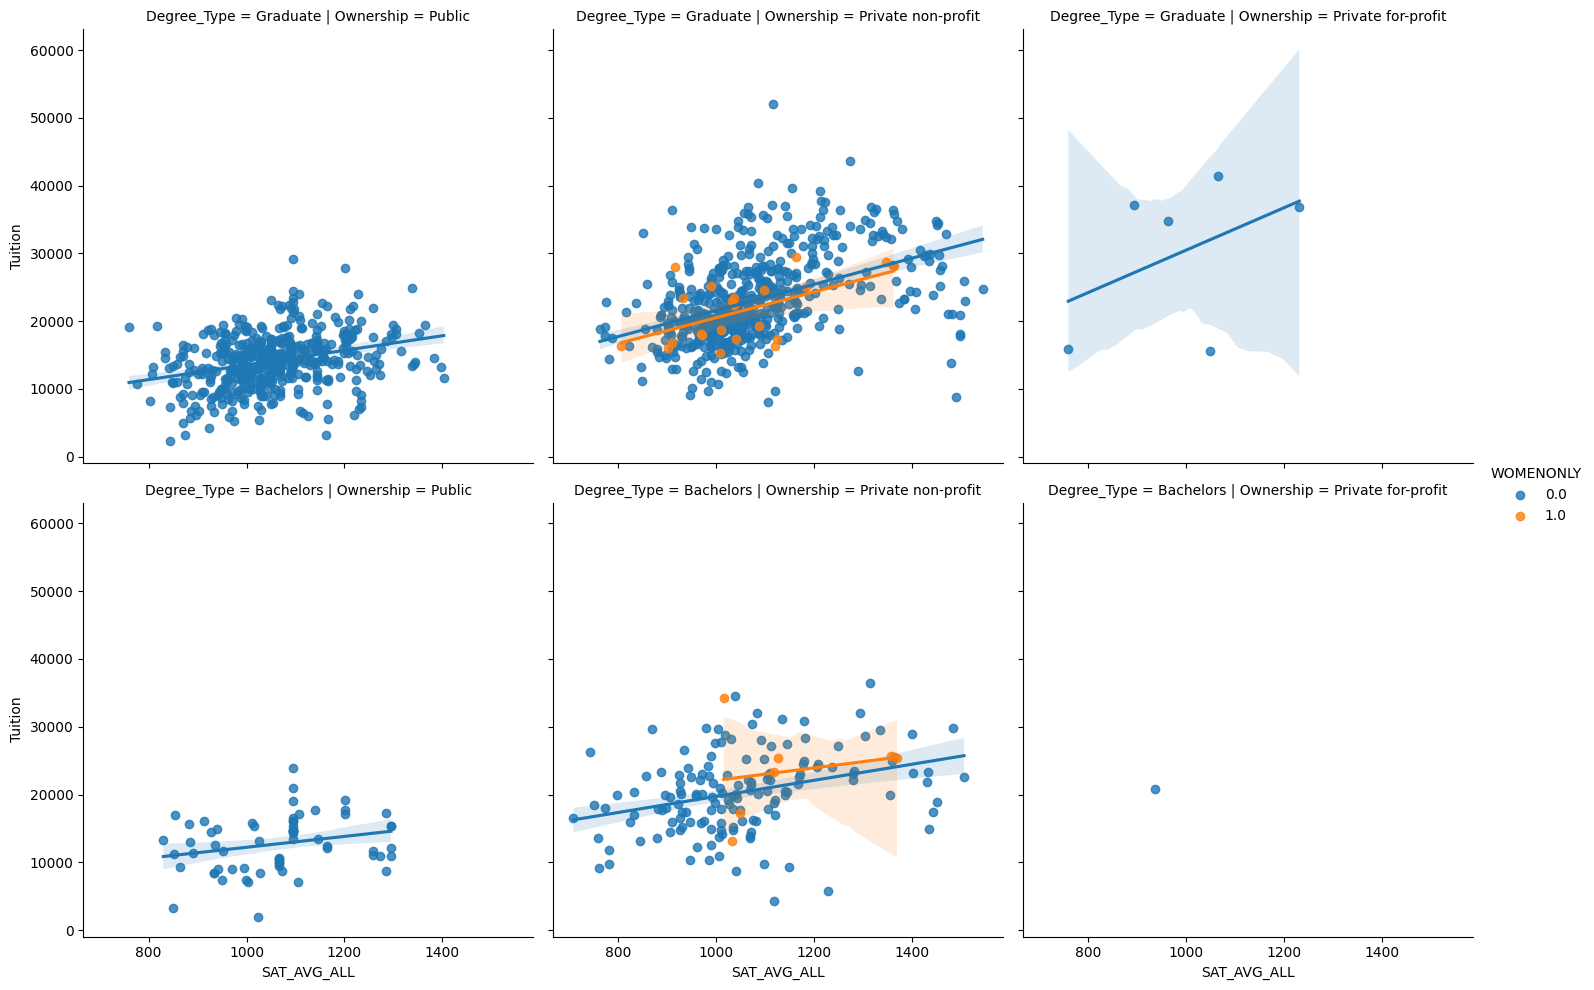

<Figure size 640x480 with 0 Axes>

In [13]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data = df,
        x = 'SAT_AVG_ALL',
        y = 'Tuition',
        col = "Ownership",
        row = 'Degree_Type',
        row_order = ['Graduate', 'Bachelors'],
        hue = 'WOMENONLY')

plt.show()
plt.clf()

# Building a PairGrid

When exploring a dataset, one of the earliest tasks is exploring the relationship between pairs of variables. This step is normally a precursor to additional investigation.

Seaborn supports this pair-wise analysis using the PairGrid. In this exercise, we will look at the Car Insurance Premium data we analyzed in Chapter 1. All data is available in the df variable.

# Instructions:

Compare "fatal_collisions" to "premiums" by using a scatter plot mapped to a PairGrid().

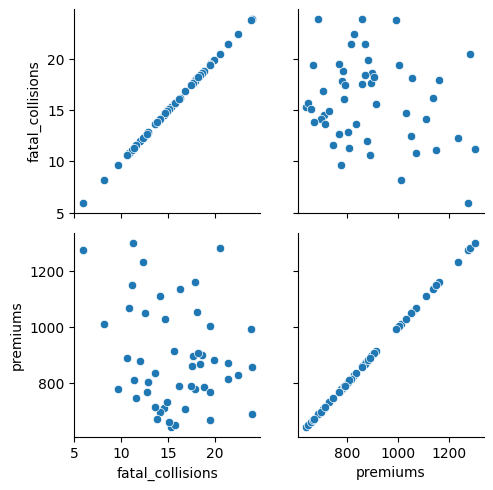

<Figure size 640x480 with 0 Axes>

In [17]:
df = pd.read_csv("Data1.csv")
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(df, vars = ["fatal_collisions", "premiums"])
g2 = g.map(sns.scatterplot)

plt.show()
plt.clf()

- Create another PairGrid but plot a histogram on the diagonal and scatter plot on the off diagonal.

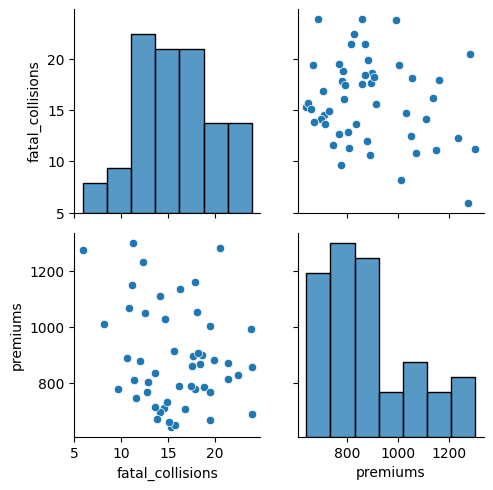

<Figure size 640x480 with 0 Axes>

In [18]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(df, vars = ["fatal_collisions", "premiums"])
g2 = g.map_diag(sns.histplot)
g3 = g2.map_offdiag(sns.scatterplot)

plt.show()
plt.clf()

# Using a pairplot

The pairplot() function is generally a more convenient way to look at pairwise relationships. In this exercise, we will create the same results as the PairGrid using less code. Then, we will explore some additional functionality of the pairplot(). We will also use a different palette and adjust the transparency of the diagonal plots using the alpha parameter.

# Instructions:

- Recreate the pairwise plot from the previous exercise using pairplot().

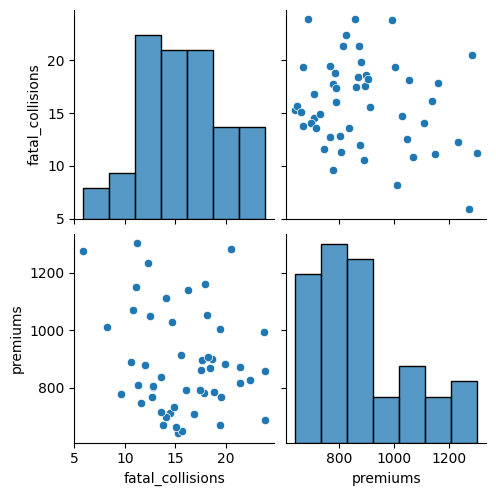

<Figure size 640x480 with 0 Axes>

In [19]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data = df,
        vars = ["fatal_collisions", "premiums"],
        kind = 'scatter')

plt.show()
plt.clf()

- Create another pairplot using the "Region" to color code the results.
- Use the RdBu palette to change the colors of the plot.

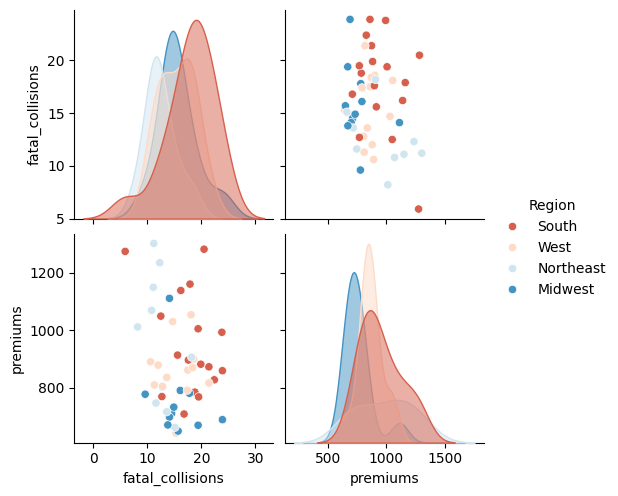

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data = df,
        vars = ["fatal_collisions", "premiums"],
        kind = 'scatter',
        hue = 'Region',
        palette = 'RdBu',
        diag_kws = {'alpha':.5})

plt.show()
plt.clf()

# Additional pairplots

This exercise will go through a couple of more examples of how the pairplot() can be customized for quickly analyzing data and determining areas of interest that might be worthy of additional analysis.

One area of customization that is useful is to explicitly define the x_vars and y_vars that you wish to examine. Instead of examining all pairwise relationships, this capability allows you to look only at the specific interactions that may be of interest.

We have already looked at using kind to control the types of plots. We can also use diag_kind to control the types of plots shown on the diagonals. In the final example, we will include a regression and kde plot in the pairplot.

# Instructions:

- Create a pair plot that examines fatal_collisions_speeding and fatal_collisions_alc on the x axis and premiums and insurance_losses on the y axis.
- Use the husl palette and color code the scatter plot by Region.

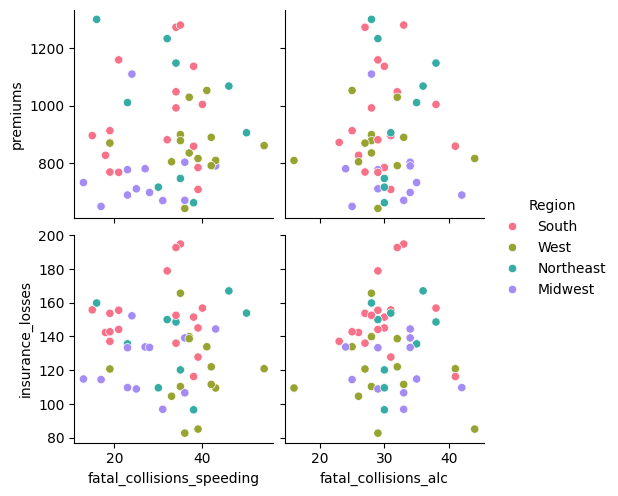

<Figure size 640x480 with 0 Axes>

In [21]:
# Build a pairplot with different x and y variables
sns.pairplot(data = df,
        x_vars = ["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars = ['premiums', 'insurance_losses'],
        kind = 'scatter',
        hue = 'Region',
        palette = 'husl')

plt.show()
plt.clf()

- Build a pairplot() with kde plots along the diagonals. Include the insurance_losses and premiums as the variables.
- Use a reg plot for the the non-diagonal plots.
- Use the BrBG palette for the final plot.

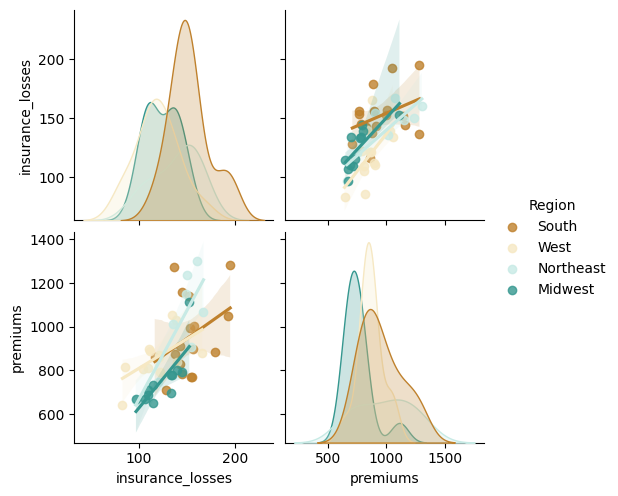

<Figure size 640x480 with 0 Axes>

In [22]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data = df,
             vars = ["insurance_losses", "premiums"],
             kind = 'reg',
             palette = 'BrBG',
             diag_kind = 'kde',
             hue = 'Region')

plt.show()
plt.clf()

# Building a JointGrid and jointplot

Seaborn's JointGrid combines univariate plots such as histograms, rug plots and kde plots with bivariate plots such as scatter and regression plots. The process for creating these plots should be familiar to you now. These plots also demonstrate how Seaborn provides convenient functions to combine multiple plots together.

For these exercises, we will use the bike share data that we reviewed earlier. In this exercise, we will look at the relationship between humidity levels and total rentals to see if there is an interesting relationship we might want to explore later.

# Instructions:

- Use Seaborn's "whitegrid" style for these plots.
- Create a JointGrid() with "hum" on the x-axis and "total_rentals" on the y.
- Plot a regplot() and histplot() on the margins.

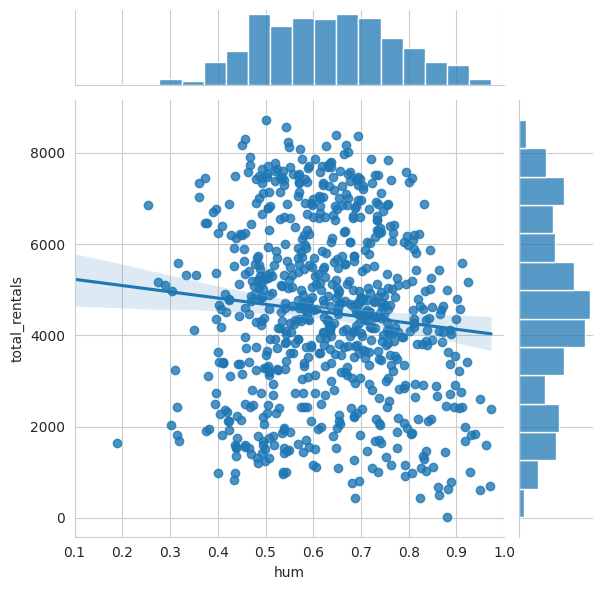

<Figure size 640x480 with 0 Axes>

In [26]:
df = pd.read_csv("data5.csv")
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x = "hum",
            y = "total_rentals",
            data = df,
            xlim = (0.1, 1.0)) 

g.plot(sns.regplot, sns.histplot)

plt.show()
plt.clf()

- Re-create the plot using a jointplot().

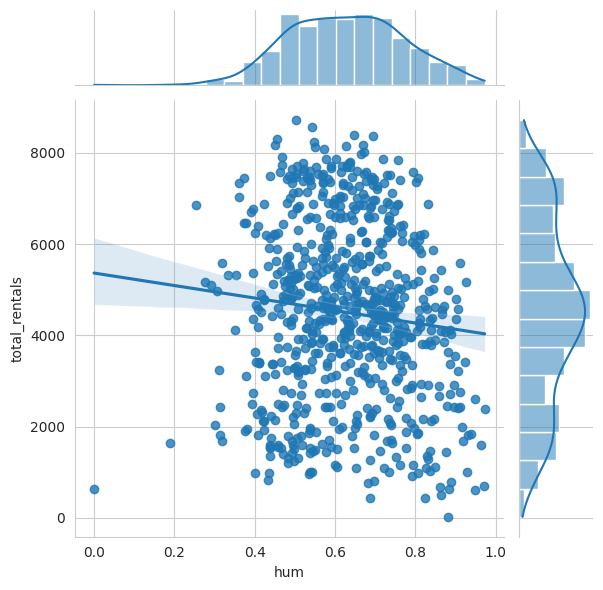

<Figure size 640x480 with 0 Axes>

In [27]:
# Create a jointplot similar to the JointGrid 
sns.jointplot(x = "hum",
        y = "total_rentals",
        kind = 'reg',
        data = df)

plt.show()
plt.clf()

# Jointplots and regression

Since the previous plot does not show a relationship between humidity and rental amounts, we can look at another variable that we reviewed earlier. Specifically, the relationship between temp and total_rentals.

# Instructions:

Create a jointplot with a 2nd order polynomial regression plot comparing temp and total_rentals.

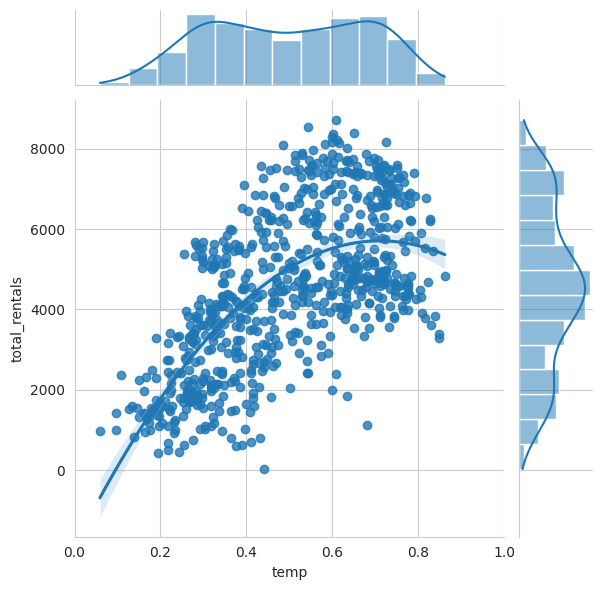

<Figure size 640x480 with 0 Axes>

In [28]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x = "temp",
         y = "total_rentals",
         kind = 'reg',
         data = df,
         order = 2,
         xlim = (0, 1))

plt.show()
plt.clf()

- Use a residual plot to check the appropriateness of the model.

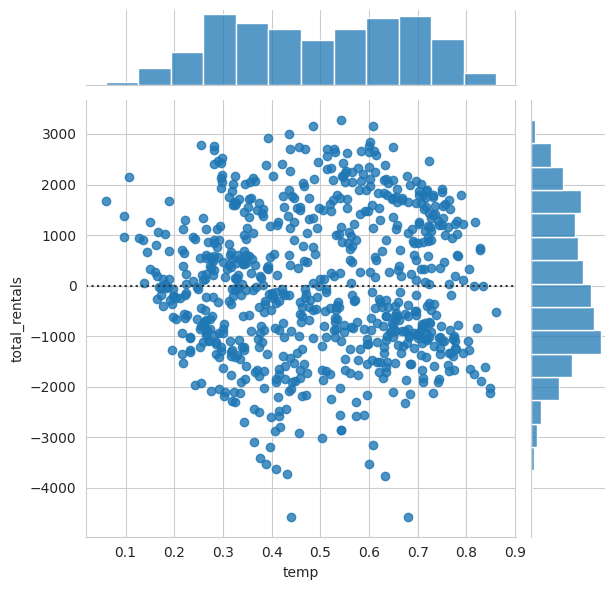

<Figure size 640x480 with 0 Axes>

In [29]:
# Plot a jointplot showing the residuals
sns.jointplot(x = "temp",
        y = "total_rentals",
        kind = 'resid',
        data = df,
        order = 2)

plt.show()
plt.clf()

# Complex jointplots

The jointplot is a convenience wrapper around many of the JointGrid functions. However, it is possible to overlay some of the JointGrid plots on top of the standard jointplot. In this example, we can look at the different distributions for riders that are considered casual versus those that are registered.

# Instructions:

- Create a jointplot with a scatter plot comparing temp and casual riders.
- Overlay a kdeplot on top of the scatter plot.

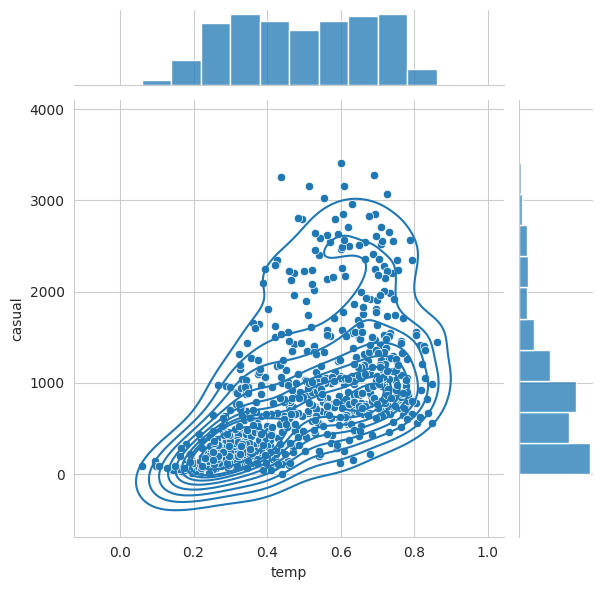

<Figure size 640x480 with 0 Axes>

In [30]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = sns.jointplot(x = "temp",
             y = "casual",
             kind = 'scatter',
             data = df,
             marginal_kws = dict(bins = 10))
g.plot_joint(sns.kdeplot)
    
plt.show()
plt.clf()

- Build a similar plot for registered users.

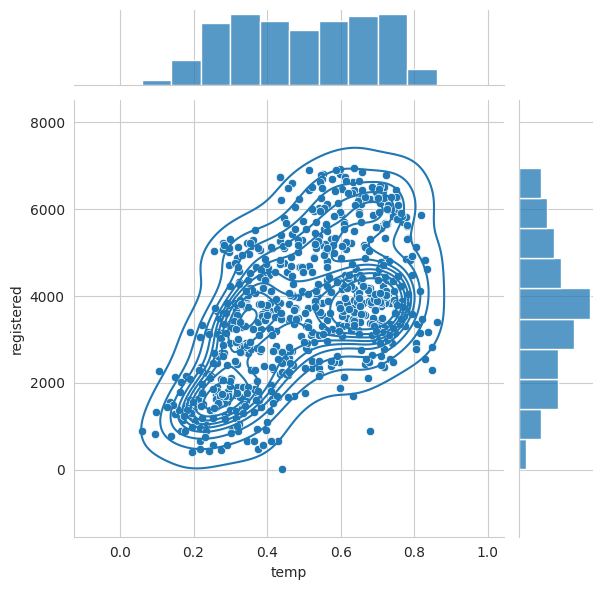

<Figure size 640x480 with 0 Axes>

In [31]:
# Replicate the above plot but only for registered riders
g = sns.jointplot(x = "temp",
             y = "registered",
             kind = 'scatter',
             data = df,
             marginal_kws = dict(bins = 10))
g.plot_joint(sns.kdeplot)

plt.show()
plt.clf()